# **Maximum Entropy Classifier**

This program predicts music preference based on age and gender and returns data entropy and average prediction accuracy over 30 runs.<br>
Run the code by clicking <b>Run All</b>.

In [32]:
#import pandas, scipy and sklearn packages

import pandas as pd
import scipy.stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from itertools import repeat
import numpy as np

**1. Read in the dataset**

In [33]:
df = pd.read_csv('SupervisedLearning/supervised_test.csv')

#TODO: Write code below to inspect the first five rows of the data frame
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


**2. Split the dataset**

In [34]:
# Run this section to inspect X
X = df.drop(columns = ['genre'])

#TODO: Write code to inspect X
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [35]:
# Uncomment this section to inpect y
y = df['genre']

#TODO: Write code to inspect y
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

**3. Compute entropy of data set**

In [36]:
# Compute the maximum entropy value
k = y.unique().size
maxE = np.log2(k)
p_data = y.value_counts(normalize=True)           # counts occurrence of each value
entropy = scipy.stats.entropy(p_data)  # get entropy from counts

# normalize the value to be between 0 and 1.
normalizedE = entropy/maxE

#TODO: Write code to display the entropy value
normalizedE

0.6721613871152705

**4. Testing: entropy-based decision tree classifier averaged over 30 runs**

In [37]:
avg_score = 0.0
ntimes = 30

for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # prediction using entropy
    # Note: You can replace 'entropy' by 'gini' to get the classifier to use the gini index criterion.
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)

    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score /= ntimes

**5. print outputs**

In [38]:
print('normalized entropy value: %.3f'% normalizedE)
print('average accuracy score: %.3f' % avg_score)

normalized entropy value: 0.672
average accuracy score: 0.875


**Output the tree dot file**

In [39]:
# output visual (can be visualized with visual code)
tree.export_graphviz(model, out_file='SupervisedLearning/EntropySupervisedModel.dot',
                    feature_names=['age', 'gender'],
                    class_names=sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

**6. Earn Your Wings: Do it yourself & Gini index test**

Test this algorithm on your own data set.
Repeat steps 4 and 5 with the gini index criterion, and save the visualization with *gini*. 

Open the dot files in VS Code, take screenshots of both trees and insert them in the text cell below.

In [40]:
df = pd.read_csv('SupervisedLearning/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [42]:
X = df.drop(columns = 'Drug')
y = df['Drug']
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [43]:
X = pd.get_dummies(X, drop_first = True)
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [44]:
# Compute the maximum entropy value
k = y.unique().size
maxE = np.log2(k)
p_data = y.value_counts(normalize=True)           # counts occurrence of each value
entropy = scipy.stats.entropy(p_data)  # get entropy from counts

# normalize the value to be between 0 and 1.
normalizedE = entropy/maxE

#TODO: Write code to display the entropy value
normalizedE

0.587724732357183

In [45]:
avg_score = 0.0
ntimes = 30

for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # prediction using entropy
    # Note: You can replace 'entropy' by 'gini' to get the classifier to use the gini index criterion.
    model = DecisionTreeClassifier(criterion='gini')
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)

    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score /= ntimes

In [46]:
print('normalized entropy value: %.3f'% normalizedE)
print('average accuracy score: %.3f' % avg_score)

normalized entropy value: 0.588
average accuracy score: 0.991


In [47]:
# output visual (can be visualized with visual code)
feature_names = [i for i in X_train.columns]
tree.export_graphviz(model, out_file='SupervisedLearning/EntropySupervisedModel2.dot',
                    feature_names=feature_names,
                    class_names=sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

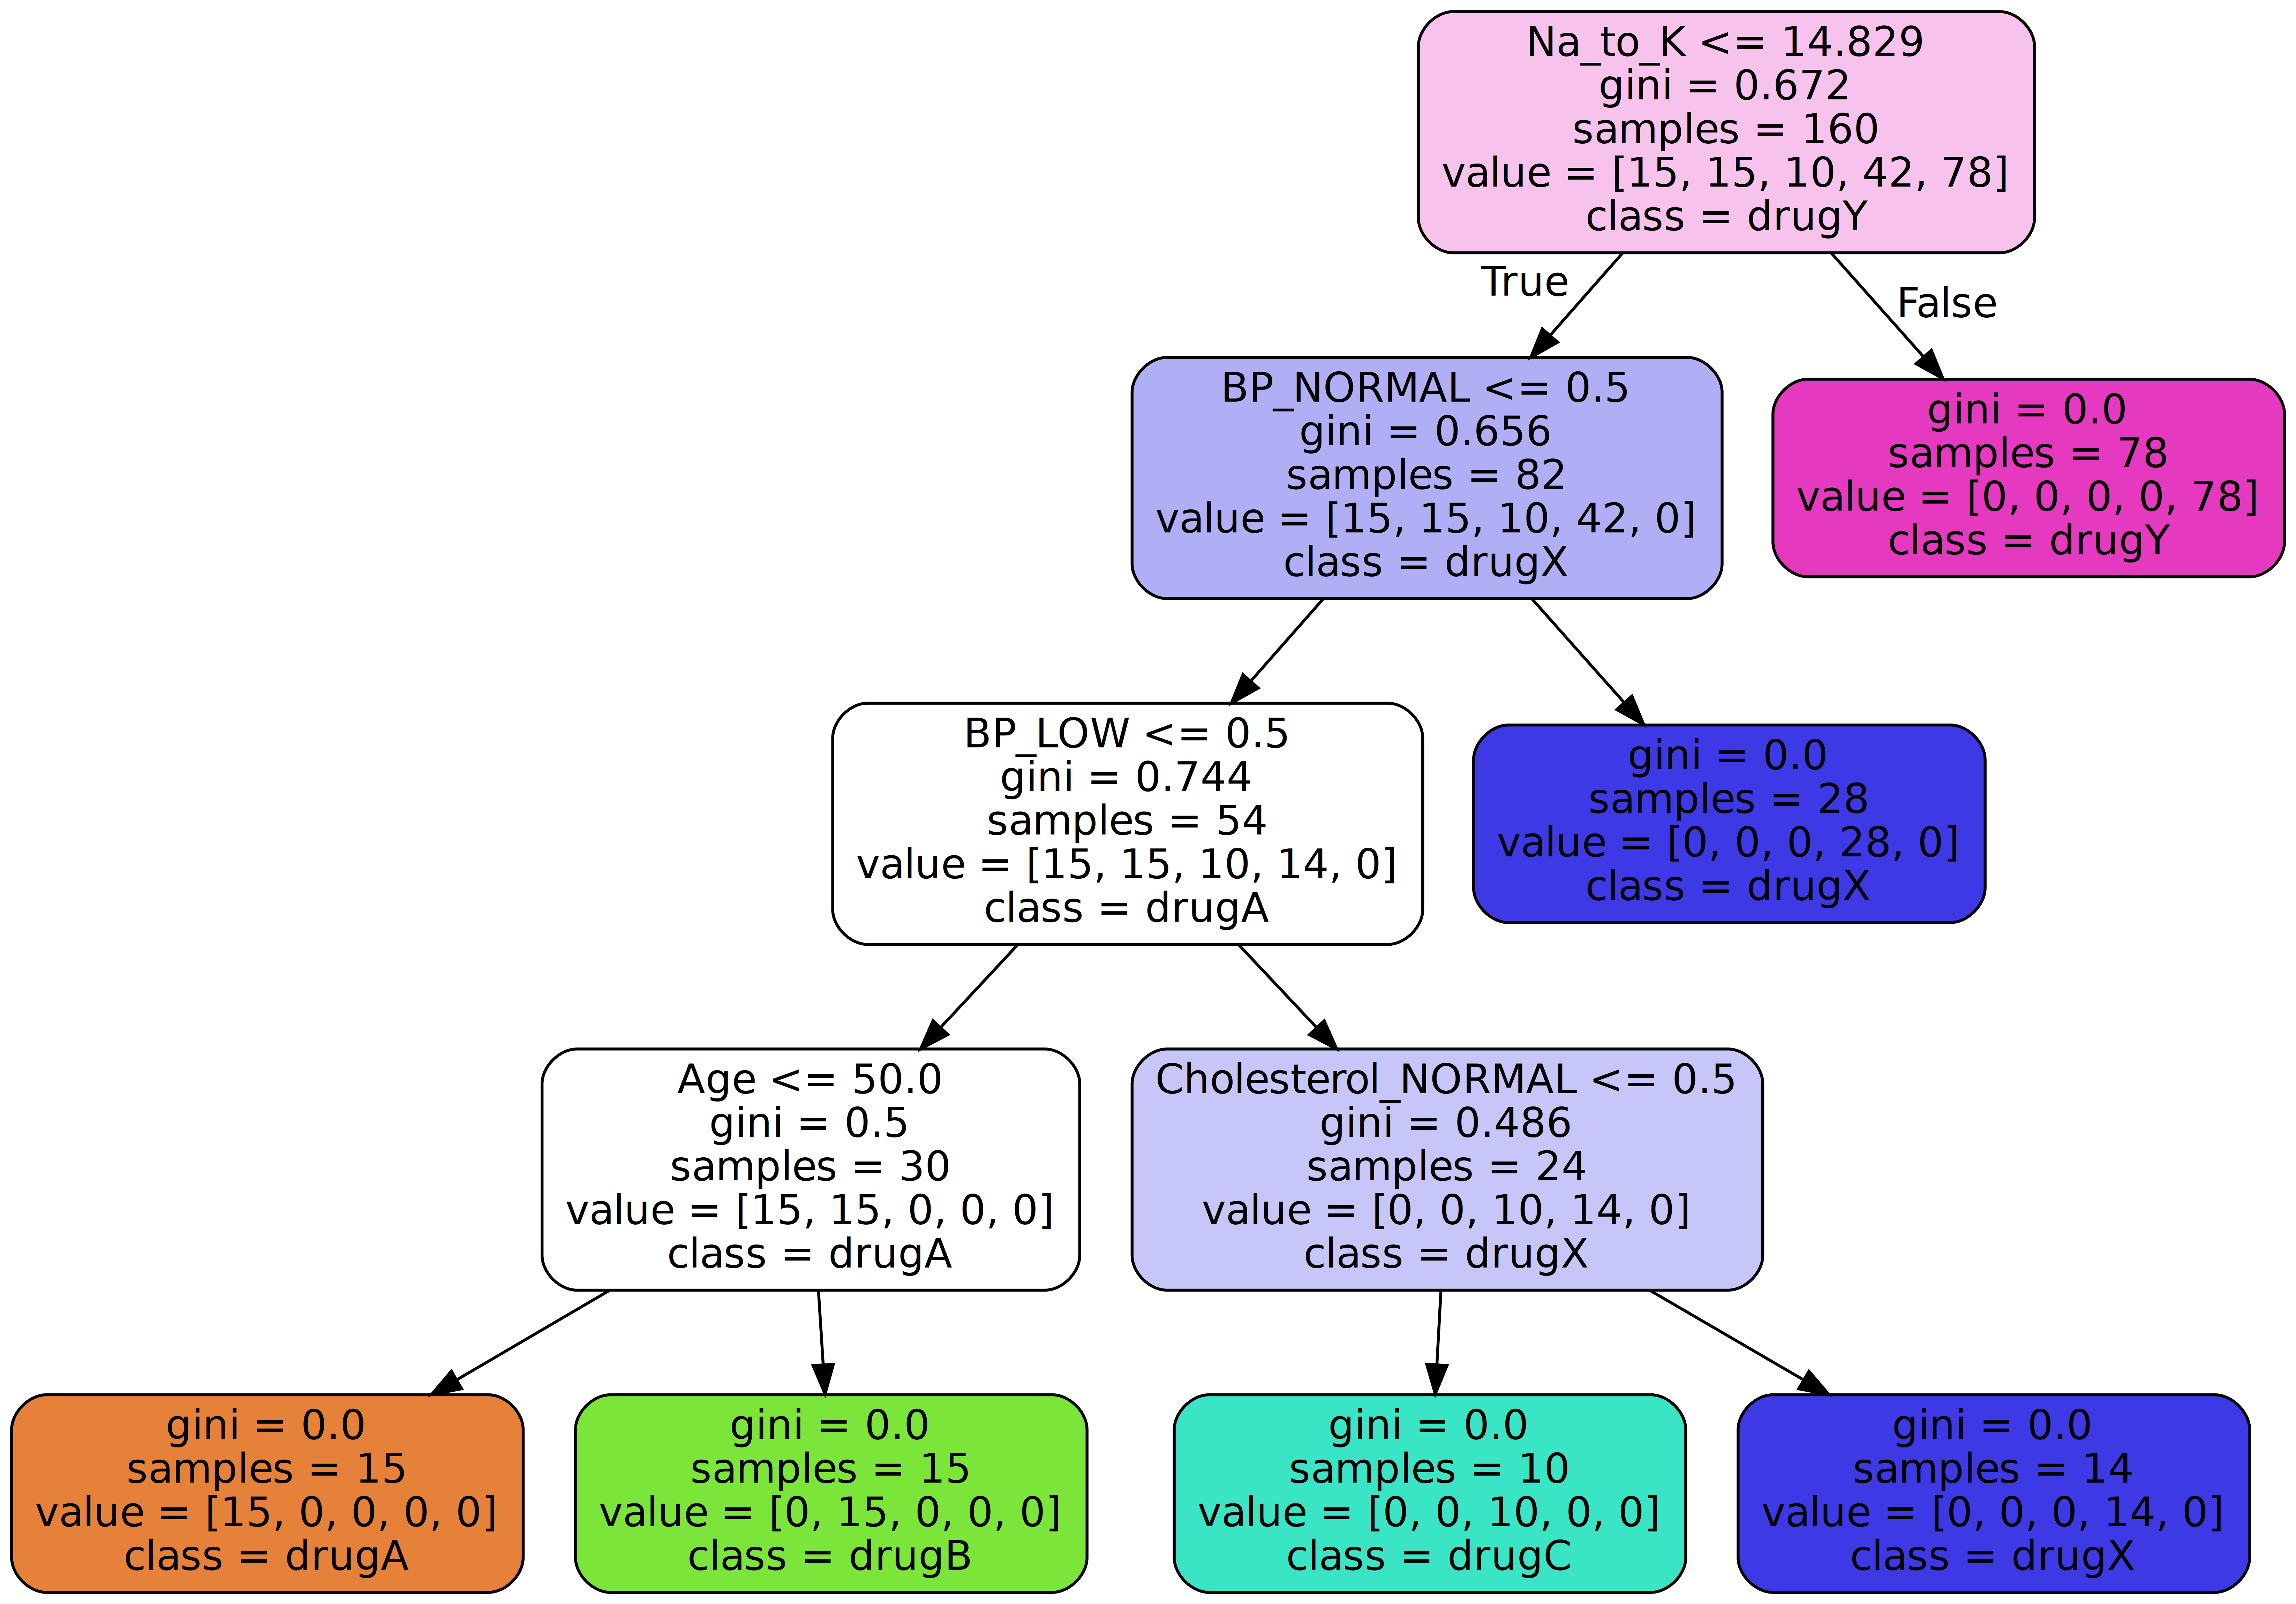

In [48]:
#Convert dot file to png
from subprocess import call
call(['dot', '-Tpng', 'SupervisedLearning/EntropySupervisedModel2.dot', '-o', 'SupervisedLearning/tree.png', '-Gdpi=600'])
#Display png
from IPython.display import Image
Image(filename = 'SupervisedLearning/tree.png')